<hr>
<div class="alert alert-warning">
<center> <h1> Business Case 3 </h1> </center> <br>
<center> Group PN: Mafalda Garcia, Simão Pereira, Rui Ribeiro, Tiago Santos  </center>

<hr>
<a class="anchor" id="index">
    
# Index
    
</a>

**Table of Contents** <br>
* [Import](#import)
    * [Import Libraries](#importlibraries)

* [1. Explore Data](#exploredata)
* [i. Market Basket Analysis](#MBA)
    * [Part 1. Association Rules](#part1ar)
       * [ALL](#all)
       * [FRANCE](#FR)
    * [Part 2. Consumer Behavior](#cbehavior)
* [ii. Recommender System](#rs)
    * [Chose Customer Here](#chosec)
    * [Final Recommendation](#finalr)
* [iii. Cold Start](#cs)
    * [United Kingdom](#uk)
    * [Germany](#ge)
    * [France](#fr)
    * [Eire](#ir)
    * [Spain](#es)
    * [Netherlands](#nl)
    * [Belgium](#be)
    * [Switzerland](#sw)
    * [Portugal](#pt)
    * [Australia](#aus)
    * [Norway](#no)

<hr>
<a class="anchor" id="import">
    
# Import
    
</a>

<a class="anchor" id="importlibraries">

## Import Libraries

</a>

In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.metrics import silhouette_score, silhouette_samples

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import seaborn as sns

from sklearn.cluster import KMeans
import datetime as dt


<hr>
<a class="anchor" id="exploredata">
    
# 1. Explore Data
    
</a>

In [3]:
data = pd.read_csv('retail worked.csv')
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Apagar
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,No
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,No
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom,No
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,No
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,No
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/01/2010 08:26,7.65,17850.0,United Kingdom,No
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/01/2010 08:26,4.25,17850.0,United Kingdom,No
7,536366,22633,HAND WARMER UNION JACK,6,12/01/2010 08:28,1.85,17850.0,United Kingdom,No
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/01/2010 08:28,1.85,17850.0,United Kingdom,No
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/01/2010 08:34,1.69,13047.0,United Kingdom,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Apagar       541909 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 37.2+ MB


In [5]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Apagar              0
dtype: int64

In [6]:
#Verify how many duplicates
data.loc[data.duplicated(), :]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Apagar
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/01/2010 11:45,1.25,17908.0,United Kingdom,No
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/01/2010 11:45,2.10,17908.0,United Kingdom,No
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/01/2010 11:45,2.95,17908.0,United Kingdom,No
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/01/2010 11:45,4.95,17908.0,United Kingdom,No
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/01/2010 11:49,2.95,17920.0,United Kingdom,No
...,...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/09/2011 11:34,0.39,14446.0,United Kingdom,No
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/09/2011 11:34,2.49,14446.0,United Kingdom,No
541692,581538,22992,REVOLVER WOODEN RULER,1,12/09/2011 11:34,1.95,14446.0,United Kingdom,No
541699,581538,22694,WICKER STAR,1,12/09/2011 11:34,2.10,14446.0,United Kingdom,No


In [7]:
data.drop_duplicates(subset=None, keep='first', inplace=True)

In [8]:
#(data.loc[data.duplicated(), :]).to_excel("Data duplicated.xlsx")

In [9]:
data['Country'].value_counts()

United Kingdom          490300
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [10]:
data.describe(include= 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Apagar
count,536641,536641,535187,536641.000000,536641,536641.000000,401604.000000,536641,536641
unique,25900,4070,4223,NaN,23260,NaN,NaN,38,2
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom,No
freq,1114,2301,2357,NaN,1114,NaN,NaN,490300,536101
mean,NaN,NaN,NaN,9.620029,NaN,4.632656,15281.160818,NaN,NaN
std,NaN,NaN,NaN,219.130156,NaN,97.233118,1714.006089,NaN,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13939.000000,NaN,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15145.000000,NaN,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16784.000000,NaN,NaN


In [11]:
data1 = data.copy()

In [12]:
filters = (
    (data1['Quantity']>0)
    &
    (data1['UnitPrice']>0)
    &
    (data1['Quantity']<60000)
)

data2 = data1[filters]

In [13]:
data2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Apagar
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,No
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,No
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom,No
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,No
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,No
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France,No
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France,No
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France,No
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France,No


In [14]:
data2.describe(include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Apagar
count,524876,524876,524876,524876.000000,524876,524876.000000,392690.000000,524876,524876
unique,19958,3921,4025,NaN,18497,NaN,NaN,38,2
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom,No
freq,1114,2253,2311,NaN,1114,NaN,NaN,479983,524476
mean,NaN,NaN,NaN,10.320933,NaN,3.922582,15287.848407,NaN,NaN
std,NaN,NaN,NaN,37.914165,NaN,36.093096,1713.536485,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.001000,12347.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13955.000000,NaN,NaN
50%,NaN,NaN,NaN,4.000000,NaN,2.080000,15150.000000,NaN,NaN
75%,NaN,NaN,NaN,11.000000,NaN,4.130000,16791.000000,NaN,NaN


In [15]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524876 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    524876 non-null  object 
 1   StockCode    524876 non-null  object 
 2   Description  524876 non-null  object 
 3   Quantity     524876 non-null  int64  
 4   InvoiceDate  524876 non-null  object 
 5   UnitPrice    524876 non-null  float64
 6   CustomerID   392690 non-null  float64
 7   Country      524876 non-null  object 
 8   Apagar       524876 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 40.0+ MB


In [16]:
data2.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132186
Country             0
Apagar              0
dtype: int64

In [17]:
data2['Description'] = data2['Description'].astype('string')

C:\Users\Mafalda_Garcia\AppData\Local\Temp\ipykernel_17420\3040903342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Description'] = data2['Description'].astype('string')


In [18]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524876 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    524876 non-null  object 
 1   StockCode    524876 non-null  object 
 2   Description  524876 non-null  string 
 3   Quantity     524876 non-null  int64  
 4   InvoiceDate  524876 non-null  object 
 5   UnitPrice    524876 non-null  float64
 6   CustomerID   392690 non-null  float64
 7   Country      524876 non-null  object 
 8   Apagar       524876 non-null  object 
dtypes: float64(2), int64(1), object(5), string(1)
memory usage: 40.0+ MB


In [19]:
filters = (
    (data1['Apagar'] == 'No')
)
data3 = data2[filters]

C:\Users\Mafalda_Garcia\AppData\Local\Temp\ipykernel_17420\2878538030.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data3 = data2[filters]


In [20]:
data3 = data3.drop(columns = 'Apagar')
data3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


In [21]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524476 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    524476 non-null  object 
 1   StockCode    524476 non-null  object 
 2   Description  524476 non-null  string 
 3   Quantity     524476 non-null  int64  
 4   InvoiceDate  524476 non-null  object 
 5   UnitPrice    524476 non-null  float64
 6   CustomerID   392329 non-null  float64
 7   Country      524476 non-null  object 
dtypes: float64(2), int64(1), object(4), string(1)
memory usage: 36.0+ MB


In [22]:
data3['Description'] = data3['Description'].str.strip()
data3.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
data3['InvoiceNo'] = data3['InvoiceNo'].astype('string')
data3 = data3[~data3['InvoiceNo'].str.contains('C')]
data3 = data3[~data3.Description.str.contains("POSTAGE")]

In [23]:
data3['TotalSpend'] = data3['UnitPrice'] * data3['Quantity']
data3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France,16.60


<hr>
<a class="anchor" id="MBA">
    
# i. Market Basket Analysis
    
</a>

<a class="anchor" id="part1ar">

## Part 1. Association Rules

</a>

<a class="anchor" id="all">

### ALL

</a>

In [24]:
basket_all = (data3.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [25]:
basket_all

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,0.0,0.0,0.0,24.0,0.0,0.0


In [26]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets_all = basket_all.applymap(encode_units)

In [27]:
frequent_itemsets_all = apriori(basket_sets_all, min_support=0.025, use_colnames=True)

In [28]:
frequent_itemsets_all

,support,itemsets
0,0.048266,(6 RIBBONS RUSTIC CHARM)
1,0.031234,(60 CAKE CASES VINTAGE CHRISTMAS)
2,0.041848,(60 TEATIME FAIRY CAKE CASES)
3,0.031083,(72 SWEETHEART FAIRY CAKE CASES)
4,0.049530,(ALARM CLOCK BAKELIKE GREEN)
...,...,...
221,0.025018,"(WHITE HANGING HEART T-LIGHT HOLDER, RED HANGI..."
222,0.025523,"(RED RETROSPOT CHARLOTTE BAG, WOODLAND CHARLOT..."
223,0.026534,"(ROSES REGENCY TEACUP AND SAUCER, REGENCY CAKE..."
224,0.027241,"(WOODEN PICTURE FRAME WHITE FINISH, WOODEN FRA..."


In [29]:
frequent_itemsets_all.describe()

,support
count,226.000000
mean,0.037377
std,0.013932
min,0.025018
25%,0.027519
50%,0.033129
75%,0.042859
max,0.114020


In [30]:
rules_all = association_rules(frequent_itemsets_all, metric="lift", min_threshold=1)
rules_all

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.049530,0.053118,0.032346,0.653061,12.294452,0.029715,2.729247
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.053118,0.049530,0.032346,0.608944,12.294452,0.029715,2.430521
2,(CHARLOTTE BAG PINK POLKADOT),(RED RETROSPOT CHARLOTTE BAG),0.037501,0.052158,0.026382,0.703504,13.487918,0.024426,3.196812
3,(RED RETROSPOT CHARLOTTE BAG),(CHARLOTTE BAG PINK POLKADOT),0.052158,0.037501,0.026382,0.505814,13.487918,0.024426,1.947645
4,(RED RETROSPOT CHARLOTTE BAG),(CHARLOTTE BAG SUKI DESIGN),0.052158,0.044577,0.025624,0.491279,11.020916,0.023299,1.878089
...,...,...,...,...,...,...,...,...,...
73,"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.038765,0.038664,0.027343,0.705346,18.243093,0.025844,3.262588
74,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.031942,0.053826,0.027343,0.856013,15.903349,0.025623,6.571231
75,(ROSES REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",0.053826,0.031942,0.027343,0.507981,15.903349,0.025623,1.967523
76,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",0.038664,0.038765,0.027343,0.707190,18.243093,0.025844,3.282790


In [31]:
rules_all.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,0.062052,0.062052,0.028644,0.507950,9.026619,0.024857,2.221297
std,0.021648,0.021648,0.003732,0.154441,4.096242,0.003556,1.267721
min,0.030223,0.030223,0.025018,0.219415,3.506399,0.020581,1.233113
25%,0.049164,0.049164,0.026382,0.405879,5.977657,0.022452,1.585944
50%,0.055089,0.055089,0.027343,0.496020,7.055085,0.023770,1.866227
75%,0.064338,0.064338,0.029491,0.610851,12.126632,0.025840,2.396587
max,0.114020,0.114020,0.041696,0.904682,18.243093,0.036009,9.954100


In [32]:
complementary = rules_all[ (rules_all['lift'] >= 6 ) &
       (rules_all['confidence'] >= 0.8) ]

In [33]:
complementary

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038664,0.051198,0.031942,0.826144,16.136309,0.029962,5.457396
72,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.030223,0.051198,0.027343,0.904682,17.670329,0.025795,9.954100
74,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.031942,0.053826,0.027343,0.856013,15.903349,0.025623,6.571231


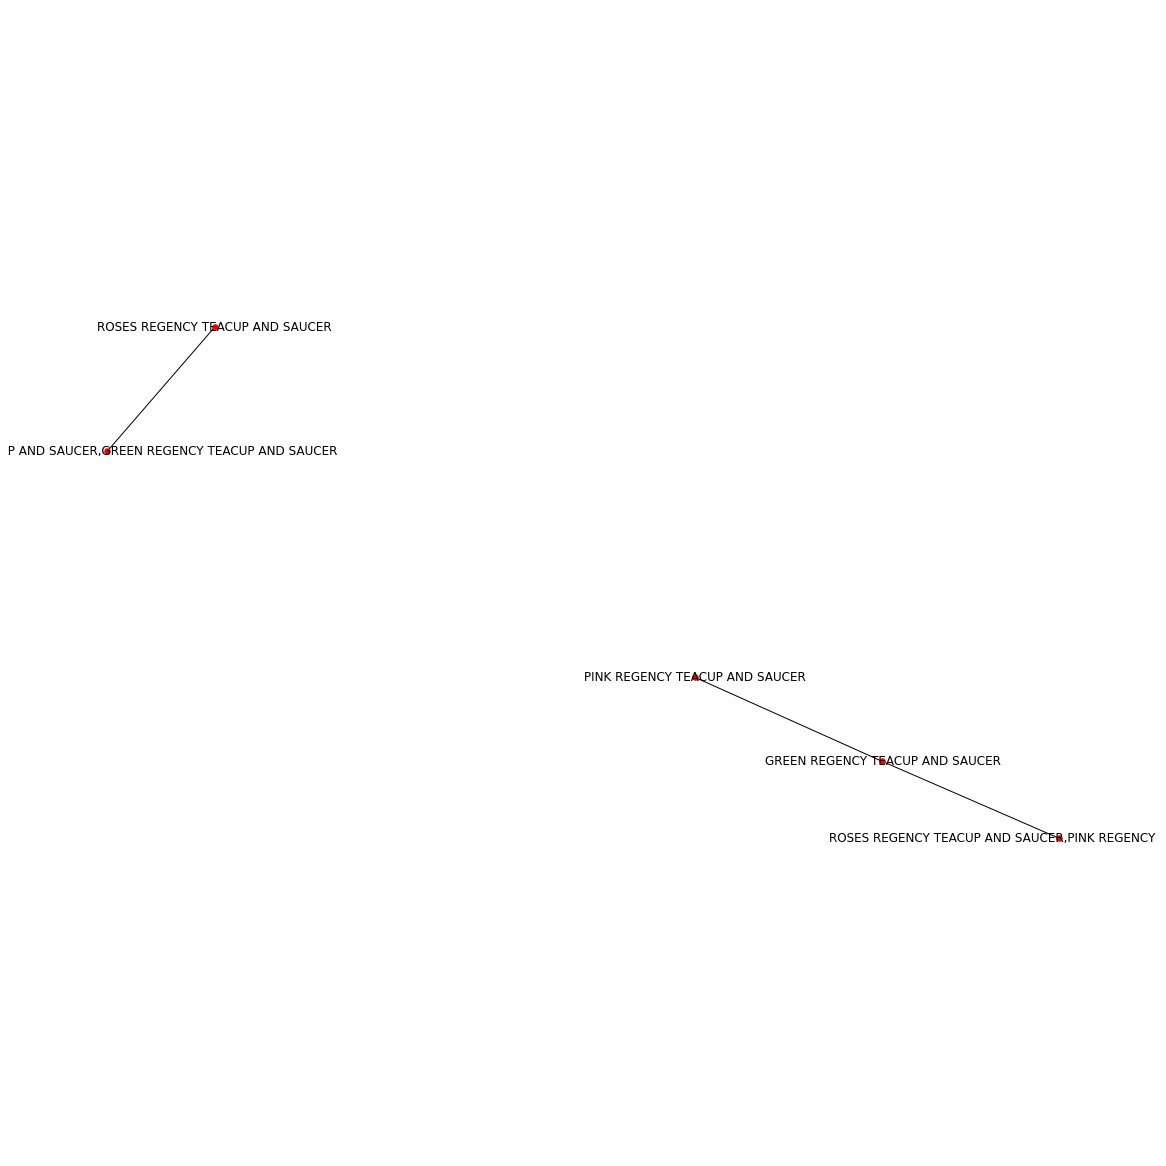

In [34]:
#Plot a network graph of the top 35 complementar
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = complementary.copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:35]
fig = plt.figure(figsize=(16, 16)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')  
# Each node is an itemset (either source or target) and the edges connect the itemsets if they consist of a high confidence rule
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()

<a class="anchor" id="FR">

### FRANCE

</a>

In [35]:
basket_fr = (data3[data3['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [36]:
basket_fr

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
basket_sets_fr = basket_fr.applymap(encode_units)

In [38]:
frequent_itemsets_fr = apriori(basket_sets_fr, min_support=0.07, use_colnames=True)

In [39]:
frequent_itemsets_fr

,support,itemsets
0,0.073107,(4 TRADITIONAL SPINNING TOPS)
1,0.099217,(ALARM CLOCK BAKELIKE GREEN)
2,0.104439,(ALARM CLOCK BAKELIKE PINK)
3,0.096606,(ALARM CLOCK BAKELIKE RED)
4,0.070496,(ASSORTED COLOUR MINI CASES)
...,...,...
56,0.104439,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO..."
57,0.104439,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED..."
58,0.125326,"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY..."
59,0.070496,"(PLASTERS IN TIN SPACEBOY, PLASTERS IN TIN WOO..."


In [40]:
rules_fr = association_rules(frequent_itemsets_fr, metric="lift", min_threshold=1)
rules_fr

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.099217,0.104439,0.075718,0.763158,7.307237,0.065356,3.781259
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.104439,0.099217,0.075718,0.725000,7.307237,0.065356,3.275576
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.099217,0.096606,0.080940,0.815789,8.444523,0.071355,4.904140
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.096606,0.099217,0.080940,0.837838,8.444523,0.071355,5.554830
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.096606,0.104439,0.075718,0.783784,7.504730,0.065629,4.141971
5,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.104439,0.096606,0.075718,0.725000,7.504730,0.065629,3.285070
6,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.101828,0.127937,0.073107,0.717949,5.611722,0.060079,3.091859
7,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.127937,0.101828,0.073107,0.571429,5.611722,0.060079,2.095735
8,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN CIRCUS PARADE),0.140992,0.172324,0.091384,0.648148,3.761223,0.067088,2.352343
9,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN SPACEBOY),0.172324,0.140992,0.091384,0.530303,3.761223,0.067088,1.828855


In [174]:
rules_fr[ (rules_fr['lift'] >= 6) &
       (rules_fr['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.099217,0.096606,0.080940,0.815789,8.444523,0.071355,4.904140
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.096606,0.099217,0.080940,0.837838,8.444523,0.071355,5.554830
18,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.140992,0.130548,0.125326,0.888889,6.808889,0.106920,7.825065
19,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.130548,0.140992,0.125326,0.960000,6.808889,0.106920,21.475196
27,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.104439,0.130548,0.101828,0.975000,7.468500,0.088193,34.778068
28,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.104439,0.140992,0.101828,0.975000,6.915278,0.087103,34.360313


In [175]:
rules_fr[ (rules_fr['lift'] >= 4) &
       (rules_fr['confidence'] <= 0.7) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.127937,0.101828,0.073107,0.571429,5.611722,0.060079,2.095735
13,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.174935,0.140992,0.107050,0.611940,4.340243,0.082385,2.213597
22,"(PLASTERS IN TIN CIRCUS PARADE, PLASTERS IN TI...",(PLASTERS IN TIN SPACEBOY),0.104439,0.140992,0.070496,0.675000,4.787500,0.055771,2.643101
23,(PLASTERS IN TIN SPACEBOY),"(PLASTERS IN TIN CIRCUS PARADE, PLASTERS IN TI...",0.140992,0.104439,0.070496,0.500000,4.787500,0.055771,1.791123
24,(PLASTERS IN TIN WOODLAND ANIMALS),"(PLASTERS IN TIN SPACEBOY, PLASTERS IN TIN CIR...",0.174935,0.091384,0.070496,0.402985,4.409808,0.054510,1.521932


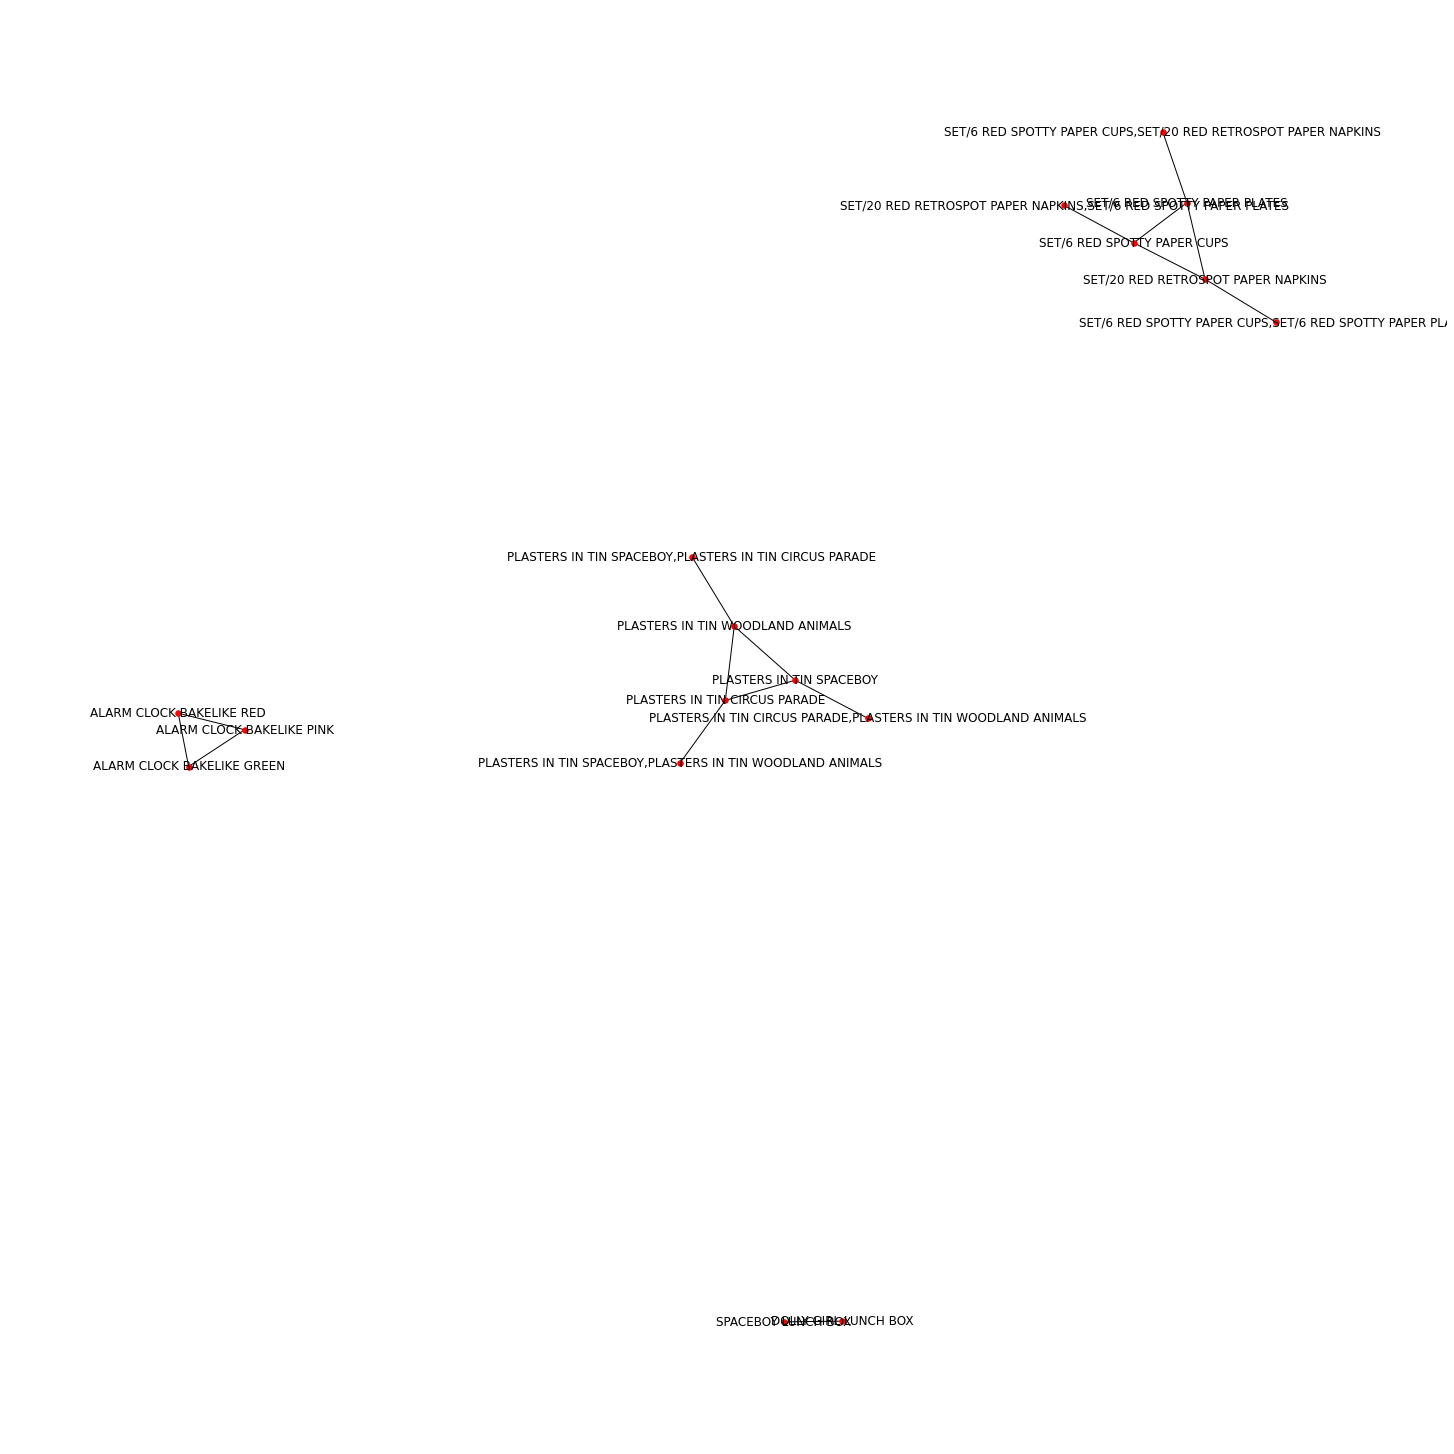

In [42]:
### Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rules_fr.copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(20, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')  
# Each node is an itemset (either source or target) and the edges connect the itemsets if they consist of a high confidence rule
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()
#fig.savefig('figure.svg')
# TRY TO PLOT THE DIRECTION OF SOURCE -> TARGET

In [43]:
### UK (we did not use this part for analysis)

In [44]:
#basket_uk = (data3[data3['Country'] =="United Kingdom"]
 #         .groupby(['InvoiceNo', 'Description'])['Quantity']
  #        .sum().unstack().reset_index().fillna(0)
   #       .set_index('InvoiceNo'))

In [45]:
#basket_uk

In [46]:
#basket_sets_uk = basket_uk.applymap(encode_units)

In [47]:
#frequent_itemsets_uk = apriori(basket_sets_uk, min_support=0.04, use_colnames=True)

In [48]:
#frequent_itemsets_uk

In [49]:
#rules_uk = association_rules(frequent_itemsets_uk, metric="lift", min_threshold=1)
#rules_uk

In [50]:
#rules_uk[ (rules_uk['lift'] >= 6) &
#       (rules_uk['confidence'] >= 0.3) ]

In [51]:
### Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
#rulesToPlot = rules_uk.copy(deep=True)
#rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
#rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
#rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
#rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
#rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
#rulesToPlot=rulesToPlot[:50]
#fig = plt.figure(figsize=(20, 20)) 
#G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')  
# Each node is an itemset (either source or target) and the edges connect the itemsets if they consist of a high confidence rule
#nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
#plt.axis('equal')
#plt.show()
#fig.savefig('figure.svg')
# TRY TO PLOT THE DIRECTION OF SOURCE -> TARGET

In [52]:
### Germany (we did not use this part for analysis)

In [53]:
#basket_de = (data3[data3['Country'] =="Germany"]
#          .groupby(['InvoiceNo', 'Description'])['Quantity']
#          .sum().unstack().reset_index().fillna(0)
#          .set_index('InvoiceNo'))

In [54]:
#basket_de

In [55]:
#basket_sets_de = basket_de.applymap(encode_units)

In [56]:
#frequent_itemsets_de = apriori(basket_sets_de, min_support=0.05, use_colnames=True)

In [57]:
#frequent_itemsets_de

In [58]:
#rules_de = association_rules(frequent_itemsets_de, metric="lift", min_threshold=1)
#rules_de

In [59]:
#rules_de[ (rules_de['lift'] >= 3) &
#       (rules_de['confidence'] >= 0.55) ]

In [60]:
### Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
#rulesToPlot = rules_de.copy(deep=True)
#rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
#rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
#rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
#rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
#rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
#rulesToPlot=rulesToPlot[:50]
#fig = plt.figure(figsize=(20, 20)) 
#G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')  
# Each node is an itemset (either source or target) and the edges connect the itemsets if they consist of a high confidence rule
#nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
#plt.axis('equal')
#plt.show()
#fig.savefig('figure.svg')
# TRY TO PLOT THE DIRECTION OF SOURCE -> TARGET

# Clustering (we did not use this part for analysis)

In [61]:
#data4 = (data3.groupby(['CustomerID', 'Description'])['Quantity']
#         .sum().unstack().reset_index().fillna(0)
#          .set_index('CustomerID'))

In [62]:
#data4

In [63]:
#data6 = (data3.groupby(['CustomerID', 'Description'])['TotalSpend']
#          .sum().unstack().reset_index().fillna(0)
#          .set_index('CustomerID'))

In [64]:
#data6

In [65]:
#range_clusters = range(1, 10)

In [66]:
#inertia = []
#for n_clus in range_clusters:  # iterate over desired ncluster range
#    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
#    kmclust.fit(data4)
#   inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

In [67]:
#inertia

In [68]:
# The inertia plot
#plt.figure(figsize=(9,5))
#plt.plot(range(1,10), inertia)
#plt.ylabel("Inertia: SSw")
#plt.xlabel("Number of clusters")
#plt.title("Inertia plot over clusters", size=15)
#plt.show()

In [69]:
# Storing average silhouette metric
#avg_silhouette = []
#for nclus in range_clusters:
    # Skip nclus == 1
#    if nclus == 1:
#        continue

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
#    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
#    cluster_labels = kmclust.fit_predict(data4)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
#    silhouette_avg = silhouette_score(data4, cluster_labels)
#    avg_silhouette.append(silhouette_avg)
 #   print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

In [70]:
# final cluster solution
#number_clusters = 3
#kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
#kmeans_labels = kmclust.fit_predict(data4)
#kmeans_labels

In [71]:
#kmeans_labels.shape

In [72]:
#data4

In [73]:
#data_kmeans = pd.concat((data4, pd.Series(kmeans_labels, name='labels')), axis=1)
#data_kmeans_avg=data_kmeans.groupby('labels').mean()
#data_kmeans_avg

<a class="anchor" id="cbehavior">

## Part 2. Consumer Behaviour

</a>

In [74]:
data_bh = data3.copy()

In [75]:
customer_country=data_bh[['Country','CustomerID']].drop_duplicates()
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
36,United Kingdom,3916
14,Germany,94
13,France,87
31,Spain,30
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,14
12,Finland,12
1,Austria,11


In [76]:
data_bh = data_bh[pd.notnull(data_bh['CustomerID'])]


In [77]:
data_bh.Quantity.min()

1

In [78]:
NOW = dt.datetime(2011,12,10)
data_bh['InvoiceDate'] = pd.to_datetime(data_bh['InvoiceDate'])

In [79]:
# create RFM table
rfmTable = data_bh.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalSpend': lambda x: x.sum()})
rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'TotalSpend': 'monetary_value'}, inplace=True)

In [80]:
rfmTable.head()

,recency,frequency,monetary_value
CustomerID,,,
12347.0,2,182,4310.00
12348.0,75,27,1437.24
12349.0,18,72,1457.55
12350.0,310,16,294.40
12352.0,36,77,1385.74


In [81]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [82]:
#create segment table
segmented_rfm = rfmTable


In [83]:
#The lowest recency, highest frequency and monetary amounts are our best customers.

def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [84]:
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12347.0,2,182,4310.00,1,1,1
12348.0,75,27,1437.24,3,3,2
12349.0,18,72,1457.55,2,2,2
12350.0,310,16,294.40,4,4,4
12352.0,36,77,1385.74,2,2,2


In [85]:
#Add a new column to combine RFM score
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
12347.0,2,182,4310.00,1,1,1,111
12348.0,75,27,1437.24,3,3,2,332
12349.0,18,72,1457.55,2,2,2,222
12350.0,310,16,294.40,4,4,4,444
12352.0,36,77,1385.74,2,2,2,222


In [86]:
#top 10 customers
segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('monetary_value', ascending=False).head(10)


,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
14646.0,1,2060,279138.02,1,1,1,111
18102.0,0,431,259657.30,1,1,1,111
17450.0,8,336,194390.79,1,1,1,111
14911.0,1,5668,140336.83,1,1,1,111
14156.0,9,1395,117210.08,1,1,1,111
17511.0,2,963,91062.38,1,1,1,111
16684.0,4,277,66653.56,1,1,1,111
13694.0,3,568,65039.62,1,1,1,111
15311.0,0,2366,60632.75,1,1,1,111


In [87]:
# Top 5 medium good customers: last purchase was a long time ago, but with a nice frequency and had spent a nice amount of money 
segmented_rfm[segmented_rfm['RFMScore']=='311'].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
12409.0,78,109,11072.67,3,1,1,311
16180.0,100,162,10254.18,3,1,1,311
12744.0,56,215,9120.39,3,1,1,311
14952.0,59,138,8099.49,3,1,1,311
16745.0,86,355,7180.70,3,1,1,311


In [88]:
# Top 5 custumers to ignore. Cheap consumers, super high recency and with a super low frequency and monetary value
segmented_rfm[segmented_rfm['RFMScore']=='444'].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
14248.0,318,8,302.58,4,4,4,444
18165.0,177,10,302.46,4,4,4,444
17094.0,322,14,302.00,4,4,4,444
13479.0,200,15,300.95,4,4,4,444
17978.0,365,12,300.92,4,4,4,444


<hr>
<a class="anchor" id="rs">
    
# ii. Recommender System
    
</a>

In [89]:
data_new=data2.copy()

In [90]:
filters = (
    (data1['Apagar'] == 'No')
)
data_new = data2[filters]

C:\Users\Mafalda_Garcia\AppData\Local\Temp\ipykernel_17420\1024950209.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_new = data2[filters]


In [91]:
data_nn = data_new.drop(columns = 'Apagar')
data_nn

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


In [92]:
data_nn.dropna(inplace =True)

In [93]:
data_nn

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


In [94]:
data_rs=data_nn.copy()
data_rs

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


In [95]:
#Top bought products
data_top=(data_rs.groupby(["Description","InvoiceNo"])["Quantity"].sum()).sort_values(ascending=False)
data_top

Description                          InvoiceNo
WORLD WAR 2 GLIDERS ASSTD DESIGNS    573008       4800
SMALL POPCORN HOLDER                 554868       4300
EMPIRE DESIGN ROSETTE                544612       3906
ESSENTIAL BALM 3.5g TIN IN ENVELOPE  560599       3186
FAIRY CAKE FLANNEL ASSORTED COLOUR   540815       3114
                                                  ... 
POSTAGE                              553884          1
SET OF 5 MINI GROCERY MAGNETS        570210          1
SWEETHEART WALL TIDY                 575051          1
DOORMAT RED RETROSPOT                548500          1
SWEETHEART WIRE WALL TIDY            545688          1
Name: Quantity, Length: 387401, dtype: int64

In [96]:
#data_rs.drop(data_rs.loc[data3['InvoiceNo']=="581483"].index, inplace=True)
#data_rs.drop(data_rs.loc[data3['InvoiceNo']=="541431"].index, inplace=True)

In [97]:
#Most frequently products that were bought in different times

data_freq= (data_rs.groupby("Description")["InvoiceNo"].count()).sort_values(ascending=False)
data_freq

Description
WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1713
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1389
                                      ... 
DIAMANTE NECKLACE                        1
WHITE ROSEBUD  PEARL EARRINGS            1
WHITE ROSEBUD & PEARL NECKLACE           1
DIAMANTE HAIR GRIP PACK/2 PERIDOT        1
ROSE PENDANT TRIPLE SHELL NECKLACE       1
Name: InvoiceNo, Length: 3873, dtype: int64

In [98]:
data4 = data3.copy()
data4.drop('TotalSpend', axis=1, inplace=True)

In [99]:
data4.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom


In [100]:
#As a base to recomend products, we will only take in consideration clients who have made more than one purchase in our store
no_buys = (data4.groupby(["CustomerID"])["InvoiceNo"].count())
df_no_buys = no_buys.to_frame()
df_no_buys

,InvoiceNo
CustomerID,
12347.0,182
12348.0,27
12349.0,72
12350.0,16
12352.0,77
...,...
18280.0,10
18281.0,7
18282.0,12


In [101]:
filters3 = (df_no_buys['InvoiceNo']>1)
more_1_buys = df_no_buys[filters3]
more_1_buys

,InvoiceNo
CustomerID,
12347.0,182
12348.0,27
12349.0,72
12350.0,16
12352.0,77
...,...
18280.0,10
18281.0,7
18282.0,12


In [102]:
#We created a list with the number of the customers who have come to the store more than once
keep_list = more_1_buys.index.tolist()
keep_list

[12347.0,
 12348.0,
 12349.0,
 12350.0,
 12352.0,
 12353.0,
 12354.0,
 12355.0,
 12356.0,
 12357.0,
 12358.0,
 12359.0,
 12360.0,
 12361.0,
 12362.0,
 12363.0,
 12364.0,
 12365.0,
 12367.0,
 12370.0,
 12371.0,
 12372.0,
 12373.0,
 12374.0,
 12375.0,
 12377.0,
 12378.0,
 12379.0,
 12380.0,
 12381.0,
 12383.0,
 12384.0,
 12386.0,
 12388.0,
 12390.0,
 12391.0,
 12393.0,
 12394.0,
 12395.0,
 12397.0,
 12398.0,
 12399.0,
 12401.0,
 12402.0,
 12403.0,
 12405.0,
 12406.0,
 12407.0,
 12408.0,
 12409.0,
 12410.0,
 12412.0,
 12413.0,
 12414.0,
 12415.0,
 12417.0,
 12418.0,
 12420.0,
 12421.0,
 12422.0,
 12423.0,
 12424.0,
 12425.0,
 12426.0,
 12427.0,
 12428.0,
 12429.0,
 12430.0,
 12431.0,
 12432.0,
 12433.0,
 12434.0,
 12435.0,
 12436.0,
 12437.0,
 12438.0,
 12441.0,
 12442.0,
 12444.0,
 12445.0,
 12446.0,
 12447.0,
 12448.0,
 12449.0,
 12450.0,
 12451.0,
 12452.0,
 12453.0,
 12454.0,
 12455.0,
 12456.0,
 12457.0,
 12458.0,
 12461.0,
 12462.0,
 12463.0,
 12464.0,
 12465.0,
 12468.0,
 12471.0,


In [103]:
#With the previously created list, we created the new DF with purchases from Customers who have come to the store more than once
data5=data4.loc[data4["CustomerID"].isin(keep_list)]

In [104]:
#We verified that in the new DF that is no customer that has only made one purchase (visit) in our store
no_buys5 = (data5.groupby(["CustomerID"])["InvoiceNo"].count())
df_no_buys5 = no_buys5.to_frame()
df_no_buys5["InvoiceNo"].sort_values(ascending=True)

CustomerID
13967.0       2
16692.0       2
16162.0       2
17896.0       2
14642.0       2
           ... 
14606.0    2675
12748.0    4397
14096.0    5095
14911.0    5668
17841.0    7667
Name: InvoiceNo, Length: 4259, dtype: int64

In [105]:
no_buys1 = (data5.groupby(["CustomerID","StockCode"])["Quantity"].sum())
df_no_buys1 = no_buys1.to_frame()
df_no_buys1.describe()
df_no_buys1

Quantity
CustomerID StockCode          
12347.0    16008            24
           17021            36
           20665             6
           20719            40
           20780            12
...                        ...
18287.0    84920             4
           85039A           96
           85039B          120
           85040A           48
           85173            48

[266120 rows x 1 columns]

In [106]:
df_no_buys1["Quantity"].describe()

count    266120.000000
mean         18.670337
std          94.253369
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       11692.000000
Name: Quantity, dtype: float64

In [107]:
data5

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


Give a review for each product by customer ID 

Quantity <= 2 : 2 // 
Quantity 3 <= 6 : 3 // 
Quantity 7 <= 12 : 4 // 
Quantity >12 : 5

In [108]:
def Rate(x): #creats a function that returns the classification based on the interval where ithe value stands
    if x <=2:
        return "2" #if the quantity bought is smaller than 2, returns Rate '2'
    elif 2<x<=6:
        return "3" #if the quantity bought is between 3 and 6, returns Rate '3'
    elif 6<x<=12:
        return "4" #if the quantity bought is between 7 and 12, returns Rate '4'
    else:
        return "5" #Otherwise (if the quantity bought is bigger than 12), returns Rate '5'
    
data5["Rating"]=data5['Quantity'].apply(Rate) #applies the function Class and on the new column ('Rating') returns the classification

C:\Users\Mafalda_Garcia\AppData\Local\Temp\ipykernel_17420\3796750180.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5["Rating"]=data5['Quantity'].apply(Rate) #applies the function Class and on the new column ('Rating') returns the classification


In [109]:
data6 = data5.copy()
data6 = data6.drop(columns = ["InvoiceNo","Description","Quantity","InvoiceDate","UnitPrice","Country"])
data6

,StockCode,CustomerID,Rating
0,85123A,17850.0,3
1,71053,17850.0,3
2,84406B,17850.0,4
3,84029G,17850.0,3
4,84029E,17850.0,3
...,...,...,...
541904,22613,12680.0,4
541905,22899,12680.0,3
541906,23254,12680.0,3
541907,23255,12680.0,3


<hr>
<a class="anchor" id="chosec">
    
# Chose Customer Here
    
</a>

In [110]:
CLIENT_WANTED = 17850.0

#### Algorithm

In [111]:
clients_purch = data6.loc[data6['CustomerID'] == CLIENT_WANTED]
clients_purch

,StockCode,CustomerID,Rating
0,85123A,17850.0,3
1,71053,17850.0,3
2,84406B,17850.0,4
3,84029G,17850.0,3
4,84029E,17850.0,3
...,...,...,...
4540,22752,17850.0,3
4541,22803,17850.0,3
4542,21730,17850.0,4
4543,22632,17850.0,4


In [112]:
similar_customers = data6[data6["StockCode"].isin(clients_purch['StockCode'].tolist())]
similar_customers

,StockCode,CustomerID,Rating
0,85123A,17850.0,3
1,71053,17850.0,3
2,84406B,17850.0,4
3,84029G,17850.0,3
4,84029E,17850.0,3
...,...,...,...
541244,22632,16558.0,4
541542,82486,15344.0,3
541619,84029G,14422.0,4
541639,85123A,14446.0,2


In [113]:
#We don't want that the DF includes the purchases done from the client themselves
wanted_list=[]
wanted_list.append(CLIENT_WANTED)
similar_customers = similar_customers.loc[~similar_customers['CustomerID'].isin(wanted_list)]
similar_customers

,StockCode,CustomerID,Rating
108,22411,15311.0,4
132,15056BL,15311.0,2
145,22411,16098.0,4
220,85123A,17511.0,5
230,84029G,17511.0,5
...,...,...,...
541244,22632,16558.0,4
541542,82486,15344.0,3
541619,84029G,14422.0,4
541639,85123A,14446.0,2


In [114]:
#Group purchases count by Customer ID
similar_customers_group = similar_customers.groupby('CustomerID')['CustomerID'].count()
similar_customers_group= similar_customers_group.sort_values(ascending=False)
similar_customers_group = similar_customers_group.to_frame()
similar_customers_group

,CustomerID
CustomerID,
13263.0,101
14911.0,101
17841.0,97
15039.0,90
15311.0,86
...,...
15456.0,1
15468.0,1
15469.0,1


In [115]:
df_weight = similar_customers_group.rename(columns = {'CustomerID':'Commonprod'}).reset_index()

In [116]:
df_weight

,CustomerID,Commonprod
0,13263.0,101
1,14911.0,101
2,17841.0,97
3,15039.0,90
4,15311.0,86
...,...,...
1999,15456.0,1
2000,15468.0,1
2001,15469.0,1
2002,15484.0,1


In [117]:
customers_ = df_weight['CustomerID'].to_list()
customers_

[13263.0,
 14911.0,
 17841.0,
 15039.0,
 15311.0,
 13089.0,
 14096.0,
 15044.0,
 12748.0,
 15719.0,
 15005.0,
 14606.0,
 17243.0,
 15021.0,
 18118.0,
 15555.0,
 17338.0,
 16549.0,
 14713.0,
 14796.0,
 16713.0,
 16525.0,
 17858.0,
 14031.0,
 17377.0,
 13777.0,
 15159.0,
 18109.0,
 16931.0,
 15856.0,
 17675.0,
 14505.0,
 14395.0,
 14298.0,
 18055.0,
 15708.0,
 13267.0,
 14432.0,
 16705.0,
 16241.0,
 14810.0,
 15547.0,
 16458.0,
 14051.0,
 17213.0,
 14156.0,
 14258.0,
 16764.0,
 18116.0,
 17511.0,
 14546.0,
 17790.0,
 17114.0,
 15601.0,
 15854.0,
 17315.0,
 17894.0,
 17049.0,
 14587.0,
 12747.0,
 12682.0,
 14769.0,
 14415.0,
 13468.0,
 12867.0,
 14527.0,
 17340.0,
 13050.0,
 14723.0,
 15640.0,
 12949.0,
 16775.0,
 13110.0,
 14401.0,
 16923.0,
 16904.0,
 13081.0,
 15808.0,
 13668.0,
 13102.0,
 15453.0,
 13831.0,
 15482.0,
 14085.0,
 14456.0,
 17802.0,
 12916.0,
 14525.0,
 13230.0,
 13408.0,
 15296.0,
 17706.0,
 17071.0,
 16033.0,
 13269.0,
 16081.0,
 17059.0,
 17602.0,
 13004.0,
 14530.0,


In [118]:
Lista=[]
for i in range(len(customers_)):
    aa = data6.loc[data6['CustomerID']==customers_[i]]
    Lista.append(len(aa["StockCode"]))
Lista

[1663,
 5668,
 7667,
 1477,
 2366,
 1814,
 5095,
 444,
 4397,
 930,
 1111,
 2675,
 386,
 444,
 1262,
 885,
 719,
 925,
 338,
 1131,
 619,
 183,
 197,
 250,
 404,
 197,
 710,
 441,
 886,
 627,
 704,
 785,
 348,
 1637,
 358,
 273,
 211,
 377,
 270,
 655,
 254,
 695,
 202,
 209,
 157,
 1395,
 111,
 700,
 370,
 963,
 397,
 189,
 123,
 410,
 138,
 468,
 191,
 317,
 371,
 103,
 495,
 1061,
 579,
 302,
 534,
 970,
 407,
 402,
 258,
 476,
 215,
 157,
 145,
 182,
 626,
 664,
 1024,
 195,
 463,
 304,
 279,
 72,
 96,
 448,
 945,
 140,
 103,
 282,
 587,
 478,
 194,
 382,
 140,
 1128,
 315,
 223,
 514,
 551,
 404,
 213,
 336,
 589,
 607,
 168,
 349,
 141,
 306,
 236,
 1174,
 97,
 134,
 252,
 444,
 314,
 87,
 331,
 381,
 579,
 252,
 269,
 127,
 55,
 369,
 131,
 68,
 358,
 319,
 196,
 327,
 313,
 167,
 120,
 636,
 151,
 419,
 382,
 114,
 206,
 143,
 135,
 58,
 292,
 258,
 499,
 59,
 551,
 568,
 113,
 432,
 161,
 392,
 423,
 368,
 355,
 289,
 198,
 291,
 38,
 189,
 202,
 2060,
 306,
 661,
 512,
 353,


In [119]:
#To give some weight to the rate that each purchase has, we created a column that is the ratio between similar purchases and 
#the total purchases of each customer 
df_weight["TotalCompras"]=Lista
df_weight["SimilarityIndex"]=(df_weight["Commonprod"]/df_weight["TotalCompras"]).round(2)
df_weight

,CustomerID,Commonprod,TotalCompras,SimilarityIndex
0,13263.0,101,1663,0.06
1,14911.0,101,5668,0.02
2,17841.0,97,7667,0.01
3,15039.0,90,1477,0.06
4,15311.0,86,2366,0.04
...,...,...,...,...
1999,15456.0,1,58,0.02
2000,15468.0,1,24,0.04
2001,15469.0,1,24,0.04
2002,15484.0,1,187,0.01


In [120]:
top30_clients = df_weight.sort_values(by='SimilarityIndex', ascending=False)[0:30]
top30_clients=top30_clients.drop(columns=['Commonprod', 'TotalCompras'])
top30_clients.head(5)

,CustomerID,SimilarityIndex
779,17616.0,1.00
915,16565.0,0.67
1068,13551.0,0.50
1275,14987.0,0.50
1045,13514.0,0.50


In [121]:
topUsersRating = top30_clients.merge(similar_customers, left_on='CustomerID', right_on='CustomerID', how='inner')
topUsersRating

,CustomerID,SimilarityIndex,StockCode,Rating
0,17616.0,1.00,85123A,5
1,17616.0,1.00,85123A,5
2,17616.0,1.00,85123A,5
3,16565.0,0.67,15056BL,3
4,16565.0,0.67,20679,3
...,...,...,...,...
77,15636.0,0.32,82482,4
78,15355.0,0.29,20679,2
79,15355.0,0.29,15056BL,3
80,15355.0,0.29,15056BL,3


In [122]:
topUsersRating["Rating"] = topUsersRating['Rating'].astype("float64")
topUsersRating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       82 non-null     float64
 1   SimilarityIndex  82 non-null     float64
 2   StockCode        82 non-null     object 
 3   Rating           82 non-null     float64
dtypes: float64(3), object(1)
memory usage: 3.2+ KB


In [123]:
topUsersRating['WeightedRating'] = topUsersRating['SimilarityIndex']*topUsersRating['Rating']
topUsersRating

,CustomerID,SimilarityIndex,StockCode,Rating,WeightedRating
0,17616.0,1.00,85123A,5.0,5.00
1,17616.0,1.00,85123A,5.0,5.00
2,17616.0,1.00,85123A,5.0,5.00
3,16565.0,0.67,15056BL,3.0,2.01
4,16565.0,0.67,20679,3.0,2.01
...,...,...,...,...,...
77,15636.0,0.32,82482,4.0,1.28
78,15355.0,0.29,20679,2.0,0.58
79,15355.0,0.29,15056BL,3.0,0.87
80,15355.0,0.29,15056BL,3.0,0.87


In [124]:
tempTopUsersRating = topUsersRating.groupby('StockCode').mean()[['WeightedRating']]
tempTopUsersRating.columns = ['SumWeightedRating']
tempTopUsersRating.head()
tempTopUsersRating.to_excel("tempTopUsersRating.xlsx")

In [125]:
#Creates an empty dataframe
recommendation = pd.DataFrame()
#Now we take the weighted average
recommendation['Weighted Recommendation Score'] = tempTopUsersRating['SumWeightedRating']
recommendation['StockCode'] = tempTopUsersRating.index
recommendation = recommendation.sort_values(by='Weighted Recommendation Score', ascending=False)
recommendation

,Weighted Recommendation Score,StockCode
StockCode,,
85123A,2.451875,85123A
84029G,1.745000,84029G
15056BL,1.714000,15056BL
22632,1.650000,22632
22633,1.650000,22633
84406B,1.650000,84406B
21871,1.485000,21871
21071,1.485000,21071
20679,1.471250,20679


In [126]:
recommendation = recommendation.reset_index(drop=True)
recommendation

,Weighted Recommendation Score,StockCode
0,2.451875,85123A
1,1.745000,84029G
2,1.714000,15056BL
3,1.650000,22632
4,1.650000,22633
5,1.650000,84406B
6,1.485000,21871
7,1.485000,21071
8,1.471250,20679
9,1.360000,82494L


In [127]:
data_prods = data5.copy()
data_prods = data_prods.drop(columns=['InvoiceNo',"Quantity","InvoiceDate","UnitPrice","CustomerID","Country","Rating"])
data_prods= data_prods.drop_duplicates(keep="first")
data_prods

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.
...,...,...
527065,90214U,"LETTER ""U"" BLING KEY RING"
527067,90214W,"LETTER ""W"" BLING KEY RING"
527069,90214Z,"LETTER ""Z"" BLING KEY RING"
530382,90089,PINK CRYSTAL SKULL PHONE CHARM


<hr>
<a class="anchor" id="finalr">
    
# Final Recommendation
    
</a>

In [128]:
final_recommendation = pd.merge(data_prods, 
                      recommendation, 
                      on ='StockCode', 
                      how ='inner')
final_recommendation = final_recommendation.sort_values(by=['Weighted Recommendation Score'], ascending = False)
final_recommendation

,StockCode,Description,Weighted Recommendation Score
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.451875
1,85123A,CREAM HANGING HEART T-LIGHT HOLDER,2.451875
5,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,1.745000
19,15056BL,EDWARDIAN PARASOL BLACK,1.714000
8,22633,HAND WARMER UNION JACK,1.650000
9,22632,HAND WARMER RED POLKA DOT,1.650000
10,22632,HAND WARMER RED RETROSPOT,1.650000
4,84406B,CREAM CUPID HEARTS COAT HANGER,1.650000
12,21871,SAVE THE PLANET MUG,1.485000
13,21071,VINTAGE BILLBOARD DRINK ME MUG,1.485000


<hr>
<a class="anchor" id="rs">
    
# iii. Cold Start
    
</a>

In [129]:
# For each country it will be recommended the top 3 bought items from all times to new customers 

<hr>
<a class="anchor" id="uk">
    
# United Kingdom
    
</a>

In [130]:
datauk = data3[data3['Country']== 'United Kingdom']
datauk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/09/2011 12:31,1.95,15804.0,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/09/2011 12:49,2.95,13113.0,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/09/2011 12:49,1.25,13113.0,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/09/2011 12:49,8.95,13113.0,United Kingdom,214.80


In [131]:
datauk2 = (datauk.groupby(['Description', 'CustomerID'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Description'))
datauk2

CustomerID,12747.0,12748.0,12749.0,12820.0,12821.0,12822.0,12823.0,12824.0,12826.0,12827.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
Description,,,,,,,,,,,,,,,,,,,,,
10 COLOUR SPACEBOY PEN,0.0,36.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0.0
12 COLOURED PARTY BALLOONS,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 DAISY PEGS IN WOOD BOX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 EGG HOUSE PAINTED WOOD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 HANGING EGGS HAND PAINTED,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZINC T-LIGHT HOLDER STARS SMALL,0.0,11.0,12.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZINC TOP 2 DOOR WOODEN SHELF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZINC WILLIE WINKIE CANDLE STICK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
datauk2['TotalQuantities'] = datauk2.sum(axis=1)
datauk2

CustomerID,12747.0,12748.0,12749.0,12820.0,12821.0,12822.0,12823.0,12824.0,12826.0,12827.0,...,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0,TotalQuantities
Description,,,,,,,,,,,,,,,,,,,,,
10 COLOUR SPACEBOY PEN,0.0,36.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0.0,4323.0
12 COLOURED PARTY BALLOONS,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1769.0
12 DAISY PEGS IN WOOD BOX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,274.0
12 EGG HOUSE PAINTED WOOD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0
12 HANGING EGGS HAND PAINTED,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZINC T-LIGHT HOLDER STARS SMALL,0.0,11.0,12.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4258.0
ZINC TOP 2 DOOR WOODEN SHELF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
ZINC WILLIE WINKIE CANDLE STICK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2006.0


In [133]:
datauk2['TotalQuantities'].sort_values(ascending = False)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS      49086.0
JUMBO BAG RED RETROSPOT                41878.0
WHITE HANGING HEART T-LIGHT HOLDER     34630.0
ASSORTED COLOUR BIRD ORNAMENT          32628.0
POPCORN HOLDER                         28923.0
                                        ...   
CROCHET DOG KEYRING                        1.0
AMBER GLASS/SHELL/PEARL NECKLACE           1.0
PACK 4 FLOWER/BUTTERFLY PATCHES            1.0
BLACK VINT ART DEC CRYSTAL BRACELET        1.0
BLOSSOM IMAGES SCRAP BOOK SET              1.0
Name: TotalQuantities, Length: 3827, dtype: float64

<hr>
<a class="anchor" id="ge">
    
# Germany
    
</a>

In [134]:
datage = data3[data3['Country']== 'Germany']
datage

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpend
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/01/2010 13:04,2.95,12662.0,Germany,17.70
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/01/2010 13:04,2.55,12662.0,Germany,15.30
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/01/2010 13:04,0.85,12662.0,Germany,10.20
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/01/2010 13:04,1.65,12662.0,Germany,19.80
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/01/2010 13:04,1.95,12662.0,Germany,23.40
...,...,...,...,...,...,...,...,...,...
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,12/09/2011 12:16,1.25,12713.0,Germany,15.00
541802,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,12/09/2011 12:16,0.85,12713.0,Germany,10.20
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,12/09/2011 12:16,0.85,12713.0,Germany,10.20
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,12/09/2011 12:16,2.08,12713.0,Germany,24.96


In [135]:
datage2 = (datage.groupby(['Description', 'CustomerID'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Description'))
datage2

CustomerID,12426.0,12427.0,12468.0,12471.0,12472.0,12473.0,12474.0,12475.0,12476.0,12477.0,...,12738.0,13810.0,13811.0,13812.0,13813.0,13814.0,13815.0,13816.0,13817.0,14335.0
Description,,,,,,,,,,,,,,,,,,,,,
10 COLOUR SPACEBOY PEN,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 COLOURED PARTY BALLOONS,0.0,0.0,20.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 IVORY ROSE PEG PLACE SETTINGS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 MESSAGE CARDS WITH ENVELOPES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 PENCIL SMALL TUBE WOODLAND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZINC HEART LATTICE T-LIGHT HOLDER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZINC METAL HEART DECORATION,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZINC T-LIGHT HOLDER STAR LARGE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
datage2['TotalQuantities'] = datage2.sum(axis=1)
datage2

CustomerID,12426.0,12427.0,12468.0,12471.0,12472.0,12473.0,12474.0,12475.0,12476.0,12477.0,...,13810.0,13811.0,13812.0,13813.0,13814.0,13815.0,13816.0,13817.0,14335.0,TotalQuantities
Description,,,,,,,,,,,,,,,,,,,,,
10 COLOUR SPACEBOY PEN,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,264.0
12 COLOURED PARTY BALLOONS,0.0,0.0,20.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0
12 IVORY ROSE PEG PLACE SETTINGS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
12 MESSAGE CARDS WITH ENVELOPES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
12 PENCIL SMALL TUBE WOODLAND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZINC HEART LATTICE T-LIGHT HOLDER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
ZINC METAL HEART DECORATION,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
ZINC T-LIGHT HOLDER STAR LARGE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0


In [137]:
datage2['TotalQuantities'].sort_values(ascending = False)

Description
ROUND SNACK BOXES SET OF4 WOODLAND    1221.0
ASSORTED COLOURS SILK FAN             1164.0
WOODLAND CHARLOTTE BAG                1020.0
PACK OF 72 RETROSPOT CAKE CASES       1002.0
PACK OF 6 BIRDY GIFT TAGS              936.0
                                       ...  
TOAST ITS - I LOVE YOU                   1.0
CHILDS GARDEN RAKE BLUE                  1.0
INFLATABLE POLITICAL GLOBE               1.0
CHRISTMAS HANGING TREE WITH BELL         1.0
ROCOCO WALL MIRROR WHITE                 1.0
Name: TotalQuantities, Length: 1691, dtype: float64

<hr>
<a class="anchor" id="fr">
    
# France
    
</a>

In [138]:
datafr = data3[data3['Country']== 'France']
datafr

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpend
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/01/2010 08:45,3.75,12583.0,France,90.00
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/01/2010 08:45,3.75,12583.0,France,90.00
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/01/2010 08:45,3.75,12583.0,France,45.00
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/01/2010 08:45,0.85,12583.0,France,10.20
30,536370,21883,STARS GIFT TAPE,24,12/01/2010 08:45,0.65,12583.0,France,15.60
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France,16.60


In [139]:
datafr2 = (datafr.groupby(['Description', 'CustomerID'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Description'))
datafr2

CustomerID,12413.0,12437.0,12441.0,12488.0,12489.0,12490.0,12491.0,12493.0,12494.0,12506.0,...,12727.0,12728.0,12729.0,12731.0,12732.0,12734.0,12735.0,12736.0,12740.0,14277.0
Description,,,,,,,,,,,,,,,,,,,,,
10 COLOUR SPACEBOY PEN,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 COLOURED PARTY BALLOONS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 EGG HOUSE PAINTED WOOD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 MESSAGE CARDS WITH ENVELOPES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 PENCIL SMALL TUBE WOODLAND,0.0,0.0,0.0,0.0,0.0,0.0,96.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZINC FOLKART SLEIGH BELLS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZINC HERB GARDEN CONTAINER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
ZINC METAL HEART DECORATION,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
datafr2['TotalQuantities'] = datafr2.sum(axis=1)
datafr2

CustomerID,12413.0,12437.0,12441.0,12488.0,12489.0,12490.0,12491.0,12493.0,12494.0,12506.0,...,12728.0,12729.0,12731.0,12732.0,12734.0,12735.0,12736.0,12740.0,14277.0,TotalQuantities
Description,,,,,,,,,,,,,,,,,,,,,
10 COLOUR SPACEBOY PEN,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,336.0
12 COLOURED PARTY BALLOONS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0
12 EGG HOUSE PAINTED WOOD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
12 MESSAGE CARDS WITH ENVELOPES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
12 PENCIL SMALL TUBE WOODLAND,0.0,0.0,0.0,0.0,0.0,0.0,96.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZINC FOLKART SLEIGH BELLS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0
ZINC HERB GARDEN CONTAINER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
ZINC METAL HEART DECORATION,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0


In [141]:
datafr2['TotalQuantities'].sort_values(ascending = False)

Description
RABBIT NIGHT LIGHT               4000.0
MINI PAINT SET VINTAGE           2196.0
RED TOADSTOOL LED NIGHT LIGHT    1291.0
SET/6 RED SPOTTY PAPER CUPS      1272.0
ASSORTED COLOUR BIRD ORNAMENT    1204.0
                                  ...  
S/6 SEW ON CROCHET FLOWERS          1.0
SCANDINAVIAN REDS RIBBONS           1.0
SCOTTIES DESIGN WASHBAG             1.0
NINJA RABBIT PINK                   1.0
MOTORING TISSUE BOX                 1.0
Name: TotalQuantities, Length: 1541, dtype: float64

<hr>
<a class="anchor" id="ir">
    
# Eire
    
</a>

In [142]:
datair = data3[data3['Country']== 'EIRE']
datair

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpend
1404,536540,22968,ROSE COTTAGE KEEPSAKE BOX,4,12/01/2010 14:05,9.95,14911.0,EIRE,39.8
1405,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,12/01/2010 14:05,2.95,14911.0,EIRE,17.7
1406,536540,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",6,12/01/2010 14:05,2.55,14911.0,EIRE,15.3
1407,536540,22355,CHARLOTTE BAG SUKI DESIGN,50,12/01/2010 14:05,0.85,14911.0,EIRE,42.5
1408,536540,21579,LOLITA DESIGN COTTON TOTE BAG,6,12/01/2010 14:05,2.25,14911.0,EIRE,13.5
...,...,...,...,...,...,...,...,...,...
539151,581433,22192,BLUE DINER WALL CLOCK,2,12/08/2011 15:54,8.50,14911.0,EIRE,17.0
539152,581433,48187,DOORMAT NEW ENGLAND,2,12/08/2011 15:54,8.25,14911.0,EIRE,16.5
539153,581433,48184,DOORMAT ENGLISH ROSE,2,12/08/2011 15:54,8.25,14911.0,EIRE,16.5
539154,581433,20685,DOORMAT RED RETROSPOT,2,12/08/2011 15:54,8.25,14911.0,EIRE,16.5


In [143]:
datair2 = (datair.groupby(['Description', 'CustomerID'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Description'))
datair2

CustomerID,14016.0,14156.0,14911.0
Description,,,
10 COLOUR SPACEBOY PEN,48.0,168.0,0.0
12 COLOURED PARTY BALLOONS,0.0,0.0,20.0
12 DAISY PEGS IN WOOD BOX,0.0,0.0,48.0
12 EGG HOUSE PAINTED WOOD,0.0,0.0,25.0
12 IVORY ROSE PEG PLACE SETTINGS,0.0,17.0,0.0
...,...,...,...
ZINC SWEETHEART WIRE LETTER RACK,0.0,4.0,4.0
ZINC T-LIGHT HOLDER STAR LARGE,0.0,0.0,36.0
ZINC T-LIGHT HOLDER STARS SMALL,0.0,0.0,72.0


In [144]:
datair2['TotalQuantities'] = datair2.sum(axis=1)
datair2

CustomerID,14016.0,14156.0,14911.0,TotalQuantities
Description,,,,
10 COLOUR SPACEBOY PEN,48.0,168.0,0.0,216.0
12 COLOURED PARTY BALLOONS,0.0,0.0,20.0,20.0
12 DAISY PEGS IN WOOD BOX,0.0,0.0,48.0,48.0
12 EGG HOUSE PAINTED WOOD,0.0,0.0,25.0,25.0
12 IVORY ROSE PEG PLACE SETTINGS,0.0,17.0,0.0,17.0
...,...,...,...,...
ZINC SWEETHEART WIRE LETTER RACK,0.0,4.0,4.0,8.0
ZINC T-LIGHT HOLDER STAR LARGE,0.0,0.0,36.0,36.0
ZINC T-LIGHT HOLDER STARS SMALL,0.0,0.0,72.0,72.0


In [145]:
datair2['TotalQuantities'].sort_values(ascending = False)

Description
PACK OF 72 RETROSPOT CAKE CASES        1632.0
60 TEATIME FAIRY CAKE CASES            1464.0
60 CAKE CASES VINTAGE CHRISTMAS        1440.0
ASSORTED INCENSE PACK                  1440.0
VINTAGE SNAP CARDS                     1420.0
                                        ...  
SILVER JEWELLED MIRROR TRINKET TRAY       1.0
SILVER CHRISTMAS TREE BAUBLE STAND        1.0
WOOD AND GLASS MEDICINE CABINET           1.0
IVORY EMBROIDERED QUILT                   1.0
SET OF 16 VINTAGE SKY BLUE CUTLERY        1.0
Name: TotalQuantities, Length: 1985, dtype: float64

<hr>
<a class="anchor" id="es">
    
# Spain
    
</a>

In [146]:
dataes = data3[data3['Country']== 'Spain']
dataes

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpend
6421,536944,22383,LUNCH BAG SUKI DESIGN,70,12/03/2010 12:20,1.65,12557.0,Spain,115.50
6422,536944,22384,LUNCH BAG PINK POLKADOT,100,12/03/2010 12:20,1.45,12557.0,Spain,145.00
6423,536944,20727,LUNCH BAG BLACK SKULL.,60,12/03/2010 12:20,1.65,12557.0,Spain,99.00
6424,536944,20725,LUNCH BAG RED RETROSPOT,70,12/03/2010 12:20,1.65,12557.0,Spain,115.50
6425,536944,20728,LUNCH BAG CARS BLUE,100,12/03/2010 12:20,1.45,12557.0,Spain,145.00
...,...,...,...,...,...,...,...,...,...
535271,581193,23291,DOLLY GIRL CHILDRENS CUP,2,12/07/2011 17:05,1.25,17097.0,Spain,2.50
535272,581193,85232D,SET/3 DECOUPAGE STACKING TINS,1,12/07/2011 17:05,4.95,17097.0,Spain,4.95
535273,581193,22721,SET OF 3 CAKE TINS SKETCHBOOK,2,12/07/2011 17:05,1.95,17097.0,Spain,3.90
535274,581193,23241,TREASURE TIN GYMKHANA DESIGN,1,12/07/2011 17:05,2.08,17097.0,Spain,2.08


In [147]:
dataes2 = (dataes.groupby(['Description', 'CustomerID'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Description'))
dataes2

CustomerID,12354.0,12417.0,12421.0,12442.0,12445.0,12448.0,12450.0,12454.0,12455.0,12462.0,...,12546.0,12547.0,12548.0,12550.0,12551.0,12556.0,12557.0,12596.0,12597.0,17097.0
Description,,,,,,,,,,,,,,,,,,,,,
10 COLOUR SPACEBOY PEN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0
12 EGG HOUSE PAINTED WOOD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 MESSAGE CARDS WITH ENVELOPES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 PENCIL SMALL TUBE WOODLAND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20 DOLLY PEGS RETROSPOT,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YELLOW FLOWERS FELT HANDBAG KIT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZINC FOLKART SLEIGH BELLS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0
ZINC METAL HEART DECORATION,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [148]:
dataes2['TotalQuantities'] = dataes2.sum(axis=1)
dataes2

CustomerID,12354.0,12417.0,12421.0,12442.0,12445.0,12448.0,12450.0,12454.0,12455.0,12462.0,...,12547.0,12548.0,12550.0,12551.0,12556.0,12557.0,12596.0,12597.0,17097.0,TotalQuantities
Description,,,,,,,,,,,,,,,,,,,,,
10 COLOUR SPACEBOY PEN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,48.0
12 EGG HOUSE PAINTED WOOD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12 MESSAGE CARDS WITH ENVELOPES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
12 PENCIL SMALL TUBE WOODLAND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
20 DOLLY PEGS RETROSPOT,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YELLOW FLOWERS FELT HANDBAG KIT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
ZINC FOLKART SLEIGH BELLS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,48.0
ZINC METAL HEART DECORATION,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0


In [149]:
dataes2['TotalQuantities'].sort_values(ascending = False)

Description
CHILDRENS CUTLERY POLKADOT PINK      729.0
CHILDRENS CUTLERY POLKADOT BLUE      653.0
LUNCH BAG CARS BLUE                  558.0
ASSORTED COLOUR BIRD ORNAMENT        417.0
LUNCH BAG PINK POLKADOT              406.0
                                     ...  
PINK METAL CHICKEN HEART               1.0
THREE MINI HANGING FRAMES              1.0
CARAVAN SQUARE TISSUE BOX              1.0
PINK HAWAIIAN PICNIC HAMPER FOR 2      1.0
WICKER WREATH SMALL                    1.0
Name: TotalQuantities, Length: 1103, dtype: float64

<hr>
<a class="anchor" id="nl">
    
# Netherlands
    
</a>

In [150]:
datanl = data3[data3['Country']== 'Netherlands']
datanl

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpend
385,536403,22867,HAND WARMER BIRD DESIGN,96,12/01/2010 11:27,1.85,12791.0,Netherlands,177.60
37952,539491,21981,PACK OF 12 WOODLAND TISSUES,12,12/20/2010 10:09,0.29,14646.0,Netherlands,3.48
37953,539491,21986,PACK OF 12 PINK POLKADOT TISSUES,12,12/20/2010 10:09,0.29,14646.0,Netherlands,3.48
37954,539491,22720,SET OF 3 CAKE TINS PANTRY DESIGN,2,12/20/2010 10:09,4.95,14646.0,Netherlands,9.90
37955,539491,21931,JUMBO STORAGE BAG SUKI,1,12/20/2010 10:09,1.95,14646.0,Netherlands,1.95
...,...,...,...,...,...,...,...,...,...
534958,581176,22908,PACK OF 20 NAPKINS RED APPLES,96,12/07/2011 15:19,0.72,14646.0,Netherlands,69.12
534959,581176,22907,PACK OF 20 NAPKINS PANTRY DESIGN,96,12/07/2011 15:19,0.72,14646.0,Netherlands,69.12
534960,581176,22029,SPACEBOY BIRTHDAY CARD,72,12/07/2011 15:19,0.36,14646.0,Netherlands,25.92
534961,581176,22712,CARD DOLLY GIRL,72,12/07/2011 15:19,0.36,14646.0,Netherlands,25.92


In [151]:
datanl2 = (datanl.groupby(['Description', 'CustomerID'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Description'))
datanl2

CustomerID,12759.0,12775.0,12778.0,12787.0,12789.0,12790.0,12791.0,12802.0,14646.0
Description,,,,,,,,,
10 COLOUR SPACEBOY PEN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,864.0
12 PENCIL SMALL TUBE WOODLAND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,384.0
12 PENCILS SMALL TUBE RED RETROSPOT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12 PENCILS TALL TUBE RED RETROSPOT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12 PENCILS TALL TUBE WOODLAND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
ZINC FOLKART SLEIGH BELLS,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0
ZINC METAL HEART DECORATION,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,216.0
ZINC T-LIGHT HOLDER STAR LARGE,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0


In [152]:
datanl2['TotalQuantities'] = datanl2.sum(axis=1)
datanl2

CustomerID,12759.0,12775.0,12778.0,12787.0,12789.0,12790.0,12791.0,12802.0,14646.0,TotalQuantities
Description,,,,,,,,,,
10 COLOUR SPACEBOY PEN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,864.0,864.0
12 PENCIL SMALL TUBE WOODLAND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,384.0,384.0
12 PENCILS SMALL TUBE RED RETROSPOT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
12 PENCILS TALL TUBE RED RETROSPOT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
12 PENCILS TALL TUBE WOODLAND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
ZINC FOLKART SLEIGH BELLS,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0,156.0
ZINC METAL HEART DECORATION,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,216.0,216.0
ZINC T-LIGHT HOLDER STAR LARGE,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,108.0


In [153]:
datanl2['TotalQuantities'].sort_values(ascending = False)

Description
RABBIT NIGHT LIGHT                    4801.0
SPACEBOY LUNCH BOX                    4528.0
DOLLY GIRL LUNCH BOX                  4132.0
PACK OF 72 RETROSPOT CAKE CASES       4128.0
ROUND SNACK BOXES SET OF4 WOODLAND    3132.0
                                       ...  
WALL ART SPACEBOY                        1.0
PANTRY CHOPPING BOARD                    1.0
ALARM CLOCK BAKELIKE IVORY               1.0
ALARM CLOCK BAKELIKE PINK                1.0
TREASURE TIN GYMKHANA DESIGN             1.0
Name: TotalQuantities, Length: 801, dtype: float64

<hr>
<a class="anchor" id="be">
    
# Belgium
    
</a>

In [154]:
databe = data3[data3['Country']== 'Belgium']
databe

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpend
7279,537026,84375,SET OF 20 KIDS COOKIE CUTTERS,12,12/03/2010 16:35,2.10,12395.0,Belgium,25.20
7280,537026,21217,RED RETROSPOT ROUND CAKE TINS,2,12/03/2010 16:35,9.95,12395.0,Belgium,19.90
7281,537026,21212,PACK OF 72 RETROSPOT CAKE CASES,120,12/03/2010 16:35,0.42,12395.0,Belgium,50.40
7282,537026,21977,PACK OF 60 PINK PAISLEY CAKE CASES,120,12/03/2010 16:35,0.42,12395.0,Belgium,50.40
7283,537026,22417,PACK OF 60 SPACEBOY CAKE CASES,120,12/03/2010 16:35,0.42,12395.0,Belgium,50.40
...,...,...,...,...,...,...,...,...,...
541193,581493,20724,RED RETROSPOT CHARLOTTE BAG,10,12/09/2011 10:10,0.85,12423.0,Belgium,8.50
541194,581493,23204,CHARLOTTE BAG APPLES DESIGN,10,12/09/2011 10:10,0.85,12423.0,Belgium,8.50
541195,581493,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,18,12/09/2011 10:10,0.79,12423.0,Belgium,14.22
541196,581493,22252,BIRDCAGE DECORATION TEALIGHT HOLDER,12,12/09/2011 10:10,1.25,12423.0,Belgium,15.00


In [155]:
databe2 = (databe.groupby(['Description', 'CustomerID'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Description'))
databe2

CustomerID,12361.0,12362.0,12364.0,12379.0,12380.0,12383.0,12390.0,12394.0,12395.0,12397.0,...,12417.0,12423.0,12431.0,12447.0,12449.0,12463.0,12464.0,12465.0,12866.0,12876.0
Description,,,,,,,,,,,,,,,,,,,,,
12 COLOURED PARTY BALLOONS,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 PENCIL SMALL TUBE WOODLAND,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 PENCILS SMALL TUBE RED RETROSPOT,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 PENCILS SMALL TUBE SKULL,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 PENCILS TALL TUBE RED RETROSPOT,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRAP PAISLEY PARK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WRAP PINK FAIRY CAKES,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WRAP RED APPLES,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
databe2['TotalQuantities'] = databe2.sum(axis=1)
databe2

CustomerID,12361.0,12362.0,12364.0,12379.0,12380.0,12383.0,12390.0,12394.0,12395.0,12397.0,...,12423.0,12431.0,12447.0,12449.0,12463.0,12464.0,12465.0,12866.0,12876.0,TotalQuantities
Description,,,,,,,,,,,,,,,,,,,,,
12 COLOURED PARTY BALLOONS,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
12 PENCIL SMALL TUBE WOODLAND,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
12 PENCILS SMALL TUBE RED RETROSPOT,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
12 PENCILS SMALL TUBE SKULL,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
12 PENCILS TALL TUBE RED RETROSPOT,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRAP PAISLEY PARK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0
WRAP PINK FAIRY CAKES,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0
WRAP RED APPLES,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0


In [157]:
databe2['TotalQuantities'].sort_values(ascending = False)

Description
PACK OF 72 RETROSPOT CAKE CASES       480.0
ROUND SNACK BOXES SET OF4 WOODLAND    420.0
PACK OF 60 SPACEBOY CAKE CASES        384.0
SPACEBOY LUNCH BOX                    340.0
DOLLY GIRL LUNCH BOX                  340.0
                                      ...  
LE GRAND TRAY CHIC SET                  1.0
VICTORIAN SEWING BOX LARGE              1.0
ROCOCO WALL MIRROR WHITE                1.0
LARGE DECO JEWELLERY STAND              1.0
DANISH ROSE BEDSIDE CABINET             1.0
Name: TotalQuantities, Length: 783, dtype: float64

<hr>
<a class="anchor" id="sw">
    
# Switzerland
    
</a>

In [158]:
datasw = data3[data3['Country']== 'Switzerland']
datasw

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpend
5320,536858,22326,ROUND SNACK BOXES SET OF4 WOODLAND,30,12/03/2010 10:36,2.95,13520.0,Switzerland,88.50
5321,536858,22554,PLASTERS IN TIN WOODLAND ANIMALS,36,12/03/2010 10:36,1.65,13520.0,Switzerland,59.40
5322,536858,21731,RED TOADSTOOL LED NIGHT LIGHT,24,12/03/2010 10:36,1.65,13520.0,Switzerland,39.60
5323,536858,20677,PINK POLKADOT BOWL,16,12/03/2010 10:36,1.25,13520.0,Switzerland,20.00
5324,536858,20750,RED RETROSPOT MINI CASES,2,12/03/2010 10:36,7.95,13520.0,Switzerland,15.90
...,...,...,...,...,...,...,...,...,...
508665,579259,22098,BOUDOIR SQUARE TISSUE BOX,36,11/29/2011 8:40,0.39,12451.0,Switzerland,14.04
508666,579259,22915,ASSORTED BOTTLE TOP MAGNETS,12,11/29/2011 8:40,0.42,12451.0,Switzerland,5.04
508667,579259,23178,JAM CLOCK MAGNET,6,11/29/2011 8:40,2.89,12451.0,Switzerland,17.34
508668,579259,23180,MUM'S KITCHEN CLOCK,4,11/29/2011 8:40,4.95,12451.0,Switzerland,19.80


In [159]:
datasw2 = (datasw.groupby(['Description', 'CustomerID'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Description'))
datasw2

CustomerID,12357.0,12371.0,12377.0,12378.0,12384.0,12398.0,12409.0,12410.0,12418.0,12422.0,...,12452.0,12456.0,12457.0,12458.0,12461.0,13492.0,13493.0,13501.0,13505.0,13520.0
Description,,,,,,,,,,,,,,,,,,,,,
10 COLOUR SPACEBOY PEN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 COLOURED PARTY BALLOONS,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 PENCIL SMALL TUBE WOODLAND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0
12 PENCILS SMALL TUBE SKULL,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 PENCILS TALL TUBE POSY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRAP SUKI AND FRIENDS,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0
YELLOW METAL CHICKEN HEART,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0
YOU'RE CONFUSING ME METAL SIGN,0.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
datasw2['TotalQuantities'] = datasw2.sum(axis=1)
datasw2

CustomerID,12357.0,12371.0,12377.0,12378.0,12384.0,12398.0,12409.0,12410.0,12418.0,12422.0,...,12456.0,12457.0,12458.0,12461.0,13492.0,13493.0,13501.0,13505.0,13520.0,TotalQuantities
Description,,,,,,,,,,,,,,,,,,,,,
10 COLOUR SPACEBOY PEN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0
12 COLOURED PARTY BALLOONS,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0
12 PENCIL SMALL TUBE WOODLAND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,48.0
12 PENCILS SMALL TUBE SKULL,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
12 PENCILS TALL TUBE POSY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRAP SUKI AND FRIENDS,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,100.0
YELLOW METAL CHICKEN HEART,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,12.0
YOU'RE CONFUSING ME METAL SIGN,0.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0


In [161]:
datasw2['TotalQuantities'].sort_values(ascending = False)

Description
PLASTERS IN TIN WOODLAND ANIMALS      636.0
ROUND SNACK BOXES SET OF4 WOODLAND    480.0
PLASTERS IN TIN SPACEBOY              468.0
PACK OF 72 RETROSPOT CAKE CASES       432.0
WOODLAND CHARLOTTE BAG                340.0
                                      ...  
DOORMAT RESPECTABLE HOUSE               2.0
3 TIER CAKE TIN GREEN AND CREAM         1.0
3 TIER CAKE TIN RED AND CREAM           1.0
WOODEN CROQUET GARDEN SET               1.0
BOTANICAL GARDENS WALL CLOCK            1.0
Name: TotalQuantities, Length: 953, dtype: float64

<hr>
<a class="anchor" id="pt">
    
# Portugal
    
</a>

In [162]:
datapt = data3[data3['Country']== 'Portugal']
datapt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpend
7134,536990,21992,VINTAGE PAISLEY STATIONERY SET,6,12/03/2010 15:14,2.95,12793.0,Portugal,17.7
7135,536990,22383,LUNCH BAG SUKI DESIGN,10,12/03/2010 15:14,1.65,12793.0,Portugal,16.5
7136,536990,20728,LUNCH BAG CARS BLUE,14,12/03/2010 15:14,1.65,12793.0,Portugal,23.1
7137,536990,20658,RED RETROSPOT LUGGAGE TAG,12,12/03/2010 15:14,1.25,12793.0,Portugal,15.0
7138,536990,20669,RED HEART LUGGAGE TAG,12,12/03/2010 15:14,1.25,12793.0,Portugal,15.0
...,...,...,...,...,...,...,...,...,...
535044,581182,23284,DOORMAT KEEP CALM AND COME IN,4,12/07/2011 15:56,8.25,12783.0,Portugal,33.0
535045,581182,22366,DOORMAT AIRMAIL,2,12/07/2011 15:56,8.25,12783.0,Portugal,16.5
535046,581182,22690,DOORMAT HOME SWEET HOME BLUE,2,12/07/2011 15:56,8.25,12783.0,Portugal,16.5
535047,581182,22692,DOORMAT WELCOME TO OUR HOME,2,12/07/2011 15:56,8.25,12783.0,Portugal,16.5


In [163]:
datapt2 = (datapt.groupby(['Description', 'CustomerID'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Description'))
datapt2

CustomerID,12356.0,12425.0,12757.0,12758.0,12762.0,12766.0,12772.0,12782.0,12783.0,12784.0,12785.0,12792.0,12793.0,12794.0,12795.0,12797.0,12808.0,12809.0,12811.0
Description,,,,,,,,,,,,,,,,,,,
10 COLOUR SPACEBOY PEN,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 PENCIL SMALL TUBE WOODLAND,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 PENCILS SMALL TUBE RED RETROSPOT,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 PENCILS TALL TUBE POSY,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 PENCILS TALL TUBE RED RETROSPOT,0.0,0.0,2.0,0.0,0.0,0.0,12.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRAP RED VINTAGE DOILY,0.0,0.0,0.0,25.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WRAP SUKI AND FRIENDS,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YOU'RE CONFUSING ME METAL SIGN,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
datapt2['TotalQuantities'] = datapt2.sum(axis=1)
datapt2

CustomerID,12356.0,12425.0,12757.0,12758.0,12762.0,12766.0,12772.0,12782.0,12783.0,12784.0,12785.0,12792.0,12793.0,12794.0,12795.0,12797.0,12808.0,12809.0,12811.0,TotalQuantities
Description,,,,,,,,,,,,,,,,,,,,
10 COLOUR SPACEBOY PEN,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
12 PENCIL SMALL TUBE WOODLAND,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
12 PENCILS SMALL TUBE RED RETROSPOT,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
12 PENCILS TALL TUBE POSY,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
12 PENCILS TALL TUBE RED RETROSPOT,0.0,0.0,2.0,0.0,0.0,0.0,12.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRAP RED VINTAGE DOILY,0.0,0.0,0.0,25.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0
WRAP SUKI AND FRIENDS,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0
YOU'RE CONFUSING ME METAL SIGN,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0


In [165]:
datapt2['TotalQuantities'].sort_values(ascending = False)

Description
POLKADOT PEN                           240.0
60 TEATIME FAIRY CAKE CASES            218.0
LUNCH BAG RED RETROSPOT                215.0
JUMBO SHOPPER VINTAGE RED PAISLEY      190.0
FRIDGE MAGNETS LES ENFANTS ASSORTED    180.0
                                       ...  
CARD HOLDER LOVE BIRD SMALL              1.0
CARD HOLDER LOVE BIRD LARGE              1.0
CALENDAR IN SEASON DESIGN                1.0
BUNDLE OF 3 RETRO NOTE BOOKS             1.0
ZINC WIRE KITCHEN ORGANISER              1.0
Name: TotalQuantities, Length: 691, dtype: float64

<hr>
<a class="anchor" id="aus">
    
# Australia
    
</a>

In [166]:
dataaus = data3[data3['Country']== 'Australia']
dataaus

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpend
197,536389,22941,CHRISTMAS LIGHTS 10 REINDEER,6,12/01/2010 10:03,8.50,12431.0,Australia,51.00
198,536389,21622,VINTAGE UNION JACK CUSHION COVER,8,12/01/2010 10:03,4.95,12431.0,Australia,39.60
199,536389,21791,VINTAGE HEADS AND TAILS CARD GAME,12,12/01/2010 10:03,1.25,12431.0,Australia,15.00
200,536389,35004C,SET OF 3 COLOURED FLYING DUCKS,6,12/01/2010 10:03,5.45,12431.0,Australia,32.70
201,536389,35004G,SET OF 3 GOLD FLYING DUCKS,4,12/01/2010 10:03,6.35,12431.0,Australia,25.40
...,...,...,...,...,...,...,...,...,...
497681,578459,22086,PAPER CHAIN KIT 50'S CHRISTMAS,20,11/24/2011 12:30,2.95,12388.0,Australia,59.00
497682,578459,22340,NOEL GARLAND PAINTED ZINC,24,11/24/2011 12:30,0.39,12388.0,Australia,9.36
497683,578459,22576,SWALLOW WOODEN CHRISTMAS DECORATION,20,11/24/2011 12:30,0.85,12388.0,Australia,17.00
497684,578459,22580,ADVENT CALENDAR GINGHAM SACK,12,11/24/2011 12:30,5.95,12388.0,Australia,71.40


In [167]:
dataaus2 = (dataaus.groupby(['Description', 'CustomerID'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Description'))
dataaus2

CustomerID,12386.0,12388.0,12393.0,12415.0,12422.0,12424.0,12431.0,12434.0,16321.0
Description,,,,,,,,,
10 COLOUR SPACEBOY PEN,0.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0
12 PENCIL SMALL TUBE WOODLAND,0.0,0.0,0.0,384.0,0.0,0.0,0.0,0.0,0.0
12 PENCILS TALL TUBE POSY,0.0,0.0,0.0,240.0,0.0,0.0,0.0,12.0,0.0
12 PENCILS TALL TUBE RED RETROSPOT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0
16 PIECE CUTLERY SET PANTRY DESIGN,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
WRAP RED APPLES,0.0,0.0,0.0,400.0,0.0,0.0,0.0,0.0,0.0
WRAP RED VINTAGE DOILY,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0
WRAP VINTAGE LEAF DESIGN,0.0,0.0,0.0,201.0,0.0,0.0,0.0,0.0,0.0


In [168]:
dataaus2['TotalQuantities'] = dataaus2.sum(axis=1)
dataaus2

CustomerID,12386.0,12388.0,12393.0,12415.0,12422.0,12424.0,12431.0,12434.0,16321.0,TotalQuantities
Description,,,,,,,,,,
10 COLOUR SPACEBOY PEN,0.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,48.0
12 PENCIL SMALL TUBE WOODLAND,0.0,0.0,0.0,384.0,0.0,0.0,0.0,0.0,0.0,384.0
12 PENCILS TALL TUBE POSY,0.0,0.0,0.0,240.0,0.0,0.0,0.0,12.0,0.0,252.0
12 PENCILS TALL TUBE RED RETROSPOT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,12.0
16 PIECE CUTLERY SET PANTRY DESIGN,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,24.0
...,...,...,...,...,...,...,...,...,...,...
WRAP RED APPLES,0.0,0.0,0.0,400.0,0.0,0.0,0.0,0.0,0.0,400.0
WRAP RED VINTAGE DOILY,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,200.0
WRAP VINTAGE LEAF DESIGN,0.0,0.0,0.0,201.0,0.0,0.0,0.0,0.0,0.0,201.0


In [169]:
dataaus2['TotalQuantities'].sort_values(ascending = False)

Description
MINI PAINT SET VINTAGE               2952.0
RABBIT NIGHT LIGHT                   1884.0
RED  HARMONICA IN BOX                1704.0
RED TOADSTOOL LED NIGHT LIGHT        1344.0
HOMEMADE JAM SCENTED CANDLES         1080.0
                                      ...  
BLACK DINER WALL CLOCK                  2.0
RECYCLED ACAPULCO MAT PINK              2.0
UNION STRIPE WITH FRINGE  HAMMOCK       2.0
VINTAGE UNION JACK MEMOBOARD            2.0
SPACEBOY CHILDRENS CUP                  1.0
Name: TotalQuantities, Length: 607, dtype: float64

<hr>
<a class="anchor" id="no">
    
# Norway
    
</a>

In [170]:
datano = data3[data3['Country']== 'Norway']
datano

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpend
1236,536532,84692,BOX OF 24 COCKTAIL PARASOLS,50,12/01/2010 13:24,0.42,12433.0,Norway,21.00
1237,536532,22444,GROW YOUR OWN PLANT IN A CAN,96,12/01/2010 13:24,1.06,12433.0,Norway,101.76
1238,536532,22899,CHILDREN'S APRON DOLLY GIRL,8,12/01/2010 13:24,2.10,12433.0,Norway,16.80
1239,536532,21156,RETROSPOT CHILDRENS APRON,8,12/01/2010 13:24,1.95,12433.0,Norway,15.60
1240,536532,22556,PLASTERS IN TIN CIRCUS PARADE,24,12/01/2010 13:24,1.65,12433.0,Norway,39.60
...,...,...,...,...,...,...,...,...,...
540357,581476,23358,HOT STUFF HOT WATER BOTTLE,18,12/09/2011 08:48,1.25,12433.0,Norway,22.50
540358,581476,23293,SET OF 12 FAIRY CAKE BAKING CASES,32,12/09/2011 08:48,0.83,12433.0,Norway,26.56
540359,581476,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,12,12/09/2011 08:48,4.95,12433.0,Norway,59.40
540360,581476,23240,SET OF 4 KNICK KNACK TINS DOILY,6,12/09/2011 08:48,4.15,12433.0,Norway,24.90


In [171]:
datano2 = (datano.groupby(['Description', 'CustomerID'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Description'))
datano2

CustomerID,12350.0,12352.0,12381.0,12430.0,12432.0,12433.0,12436.0,12438.0,12444.0,12752.0
Description,,,,,,,,,,
10 COLOUR SPACEBOY PEN,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 PENCILS TALL TUBE SKULLS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0
12 PENCILS TALL TUBE WOODLAND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0
20 DOLLY PEGS RETROSPOT,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0
200 RED + WHITE BENDY STRAWS,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,72.0
...,...,...,...,...,...,...,...,...,...,...
ZINC HEART FLOWER T-LIGHT HOLDER,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZINC HEART LATTICE CHARGER LARGE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0
ZINC T-LIGHT HOLDER STAR LARGE,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
datano2['TotalQuantities'] = datano2.sum(axis=1)
datano2

CustomerID,12350.0,12352.0,12381.0,12430.0,12432.0,12433.0,12436.0,12438.0,12444.0,12752.0,TotalQuantities
Description,,,,,,,,,,,
10 COLOUR SPACEBOY PEN,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
12 PENCILS TALL TUBE SKULLS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,24.0
12 PENCILS TALL TUBE WOODLAND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,24.0
20 DOLLY PEGS RETROSPOT,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,48.0
200 RED + WHITE BENDY STRAWS,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,72.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...
ZINC HEART FLOWER T-LIGHT HOLDER,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
ZINC HEART LATTICE CHARGER LARGE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0
ZINC T-LIGHT HOLDER STAR LARGE,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0


In [173]:
datano2['TotalQuantities'].sort_values(ascending = False)

Description
SMALL FOLDING SCISSOR(POINTED EDGE)    576.0
GROW A FLYTRAP OR SUNFLOWER IN TIN     504.0
FENG SHUI PILLAR CANDLE                384.0
POPCORN HOLDER                         300.0
PINK HEART SHAPE EGG FRYING PAN        252.0
                                       ...  
WHITE SOAP RACK WITH 2 BOTTLES           2.0
NEW BAROQUE JEWELLERY BOX                2.0
SCHOOL DESK AND CHAIR                    2.0
CLASSIC METAL BIRDCAGE PLANT HOLDER      1.0
SET 3 WICKER STORAGE BASKETS             1.0
Name: TotalQuantities, Length: 593, dtype: float64